In [ ]:
from google.colab import files
import zipfile
import os

# Upload archive.zip
uploaded = files.upload()

# Extract the ZIP
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")


Saving archive.zip to archive.zip


In [ ]:
# Read the 'name of the animals.txt' file
with open('/content/name of the animals.txt', 'r') as f:
    animal_names = f.read().splitlines()

print(f"Total Animal Classes: {len(animal_names)}")


Total Animal Classes: 90
['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


In [ ]:
from PIL import Image
import numpy as np

image_data = []
labels = []

# Path where animal folders exist
base_dir = "/content/animals/animals"

# Create label map
class_names = sorted(os.listdir(base_dir))
class_to_index = {name: idx for idx, name in enumerate(class_names)}

# Nested loop: class folder → each image
for class_name in class_names:
    class_path = os.path.join(base_dir, class_name)

    if not os.path.isdir(class_path):
        continue

    for img_file in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path).resize((128, 128)).convert('RGB')
            image_data.append(np.array(img))
            labels.append(class_to_index[class_name])
        except:
            print(f"Skipping: {img_path}")


In [ ]:
# Normalize image data
X = np.array(image_data) / 255.0
y = np.array(labels)

print("Image dataset shape:", X.shape)
print("Labels shape:", y.shape)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y, num_classes=len(class_names))

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)


Image dataset shape: (5400, 128, 128, 3)
Labels shape: (5400,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),

    Dense(len(class_names), activation='softmax')  # Output for 90 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 90)                  │           5,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,406,426 (28.25 MB)

 Trainable params: 7,406,426 (28.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 97s 770ms/step - accuracy: 0.0110 - loss: 4.6489 - val_accuracy: 0.0093 - val_loss: 4.4855
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 139s 750ms/step - accuracy: 0.0256 - loss: 4.4458 - val_accuracy: 0.0278 - val_loss: 4.3254
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 86s 704ms/step - accuracy: 0.0254 - loss: 4.3329 - val_accuracy: 0.0463 - val_loss: 4.2612
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 144s 721ms/step - accuracy: 0.0430 - loss: 4.2760 - val_accuracy: 0.0532 - val_loss: 4.2397
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 143s 733ms/step - accuracy: 0.0577 - loss: 4.1498 - val_accuracy: 0.0949 - val_loss: 4.1303
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 139s 707ms/step - accuracy: 0.1027 - loss: 3.8837 - val_accuracy: 0.1019 - val_loss: 3.9600
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 88s 720ms/step - accuracy: 0.1422 - loss: 3.5585 - val_accuracy: 0.1227 - val_loss: 3.8614
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 140s 706ms/step - accuracy: 0.2162 - lo

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2%}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.2212 - loss: 3.6774
Test Accuracy: 22.59%


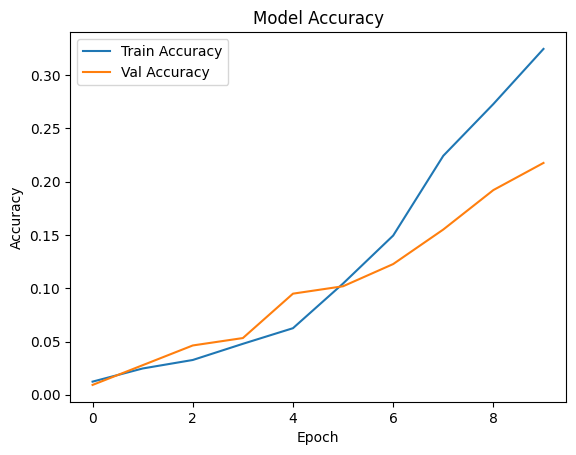

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
